## S15 T01: Classifica els diferents vols - Eduardo Baffi

### Part 1 (Exercises Level 1)

#### Descripció
Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.

### Nivell 1

#### - Exercici 1
Classifica els diferents vols utilitzant l'algorisme de K-means.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Dataset Airlines Delay

Airline on-time statistics and delay causes
Source: https://www.kaggle.com/giovamata/airlinedelaycauses
### Variable descriptions
(available here: http://stat-computing.org/dataexpo/2009/the-data.html)
     
    Name: Description
1.	Year:	             1987-2008
2.	Month:	             1-12
3.	DayofMonth:	         1-31
4.	DayOfWeek:	         1 (Monday) - 7 (Sunday)
5.	DepTime	actual:       departure time (local, hhmm)
6.	CRSDepTime:	         scheduled departure time (local, hhmm)
7.	ArrTime:	             actual arrival time (local, hhmm)
8.	CRSArrTime:	         scheduled arrival time (local, hhmm)
9.	UniqueCarrier:	     unique carrier code
10.	FlightNum:	         flight number
11.	TailNum	plane:        tail number
12.	ActualElapsedTime:	 in minutes
13.	CRSElapsedTime:	     in minutes
14.	AirTime:	             in minutes
15.	ArrDelay:	         arrival delay, in minutes
16.	DepDelay:	         departure delay, in minutes
17.	Origin:	             origin IATA airport code
18.	Dest:	             destination IATA airport code
19.	Distance:	         in miles
20.	TaxiIn	taxi:         in time, in minutes
21.	TaxiOut	taxi:         out time in minutes
22.	Cancelled:	         was the flight cancelled?
23.	CancellationCode:	 reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	Diverted:	         1 = yes, 0 = no
25.	CarrierDelay:	     in minutes
26.	WeatherDelay:	     in minutes
27.	NASDelay:	         in minutes
28.	SecurityDelay:	     in minutes
29.	LateAircraftDelay:	 in minutes

Source: https://aspmhelp.faa.gov/index/Types_of_Delay.html
Carrier delay is within the control of the air carrier.

Late Arrival Delay: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.

NAS Delay: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Weather Delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.        

In [2]:
# Original Dataset
df = pd.read_parquet('DelayedFlights.dat')
df.head(1)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Prepocessing data

In [3]:
df.duplicated().sum()

0

In [4]:
# Check null values
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [5]:
# % missing values per column 
missing_data_count = df.isnull().sum()
total_rows = len(df.index)
missing_percent = missing_data_count/total_rows*100
missing_percent

Unnamed: 0            0.000000
Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [6]:
# Delete rows with a low % of null values:'ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'

# There are many null values in columns 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay' (about 35% of total). 
# The dataset is big, so these columns will be dropped to avoid distortion in the classification process
# Drop 'Unnamed: 0'column

flights_df = df.copy()
flights_df = flights_df.dropna(axis=0, subset=['ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'])
flights_df = flights_df.drop(['Unnamed: 0', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 1)
flights_df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [7]:
pd.set_option('display.max_columns', None)
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0


In [8]:
# Excluding column 'Year', because it has the same value for all the dataset
# Excluding categorical and binary data
flights_df = flights_df.drop(['Year','UniqueCarrier','FlightNum','TailNum','Origin','Dest', 'Cancelled','CancellationCode','Diverted'], 1)

In [9]:
flights_df.head(1)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
0,1,3,4,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0


In [10]:
# Sampling the Dataset

sample_df = flights_df.sample(frac=0.02) # The dataset is big, so a sample will be used to speed up performance

In [11]:
# Cyclical data
print ('Unique values of month:',sample_df.Month.unique())
print ('Unique values of day of the month:',sample_df.DayofMonth.unique())
print ('Unique values of day of the week:',sample_df.DayOfWeek.unique())

Unique values of month: [ 3  6  9  7  2  4  1  5  8 11 10 12]
Unique values of day of the month: [24 28 23  5  1 17  4 16 19 22 26 15 12 18 14  3  8 10 11  7  6 31 30 29
 21 27 25  2 13 20  9]
Unique values of day of the week: [1 6 7 5 2 4 3]


In [12]:
# Dealing with cyclical data 
sample_df['Month_sin'] = np.sin((sample_df.Month-1)*(2.*np.pi/12))
sample_df['Month_cos'] = np.cos((sample_df.Month-1)*(2.*np.pi/12))
sample_df['DayMnth_sin'] = np.sin((sample_df.DayofMonth-1)*(2.*np.pi/31))
sample_df['DayMnth_cos'] = np.cos((sample_df.DayofMonth-1)*(2.*np.pi/31))
sample_df['DayWeek_sin'] = np.sin((sample_df.DayOfWeek-1)*(2.*np.pi/7))
sample_df['DayWeek_cos'] = np.cos((sample_df.DayOfWeek-1)*(2.*np.pi/7))

In [13]:
featured_df = sample_df.drop(['Month', 'DayofMonth', 'DayOfWeek'], 1)
featured_df.head(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Month_sin,Month_cos,DayMnth_sin,DayMnth_cos,DayWeek_sin,DayWeek_cos
474941,1611.0,1505,1800.0,1638,109.0,93.0,73.0,82.0,66.0,432,7.0,29.0,0.866025,0.5,-0.998717,-0.050649,0.0,1.0


In [14]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = featured_df.values
x = scaler.fit_transform(x)
scaled_features_df = pd.DataFrame(x, index=featured_df.index, columns=featured_df.columns)
scaled_features_df

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Month_sin,Month_cos,DayMnth_sin,DayMnth_cos,DayWeek_sin,DayWeek_cos
474941,0.204554,0.085748,0.341093,0.005922,-0.339861,-0.581005,-0.516535,0.693296,0.425529,-0.582945,0.031817,0.759917,1.158692,0.636474,-1.392492,-0.035502,-0.010019,1.396045
1015908,-0.177743,-0.090871,-0.016239,-0.172591,-0.660033,-0.693686,-0.531151,-0.556657,-0.624467,-0.610937,-0.524686,-0.582480,0.606223,-1.204443,-1.009083,1.022294,-1.430243,-0.285594
400217,0.693539,0.815775,0.603136,0.644698,-0.854920,-0.764111,-0.764999,-0.591378,-0.495520,-0.679169,-0.524686,-0.441175,1.158692,0.636474,-1.349606,-0.321545,-1.148950,0.878137
1450178,1.162520,1.267920,1.090574,1.092056,-0.646112,-0.538749,-0.531151,-0.278890,-0.145522,-0.530458,-0.710187,-0.441175,-1.455622,-0.711171,1.019887,1.022294,-0.642078,-1.218833
1135524,0.918028,1.060687,0.740572,0.829664,-0.381623,-0.172536,-0.194995,-0.782343,-0.550783,-0.128065,0.031817,-1.006395,-0.148465,-1.384993,0.005402,1.467132,1.128913,0.878137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704995,0.682426,0.650930,0.736907,0.612437,-0.325941,-0.552834,-0.297303,0.241924,-0.034996,-0.554952,0.588320,-0.441175,1.360910,-0.037348,-1.349606,-0.321545,1.410205,-0.285594
863170,0.966926,1.110140,0.953138,1.049041,-0.465146,-0.440154,-0.399611,-0.539296,-0.532362,-0.376499,-0.895688,-0.087913,1.158692,-0.711171,0.005402,1.467132,0.622041,-1.218833
1326775,0.431265,0.441342,0.366747,0.378004,-0.172815,0.010570,-0.048840,-0.678180,-0.477099,0.050388,0.031817,-0.653133,-0.903153,-1.204443,-1.251246,-0.592913,-0.642078,-1.218833
1824229,-1.153490,-1.221235,0.027740,-0.058601,1.887421,1.743038,1.763481,-0.365692,-0.606046,2.111343,0.217318,0.971874,-0.903153,1.129746,1.262050,-0.592913,0.622041,-1.218833


##### K-Means Clustering

In [15]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)

In [17]:
kmeans.fit(scaled_features_df)

KMeans(init='random', n_clusters=5, random_state=42)

In [18]:
kmeans.inertia_

469213.57207756175

In [19]:
kmeans.cluster_centers_

array([[-9.67014990e-01, -9.88955356e-01, -7.32300264e-01,
        -9.98449577e-01, -3.65427040e-01, -3.63614061e-01,
        -3.52957144e-01, -2.50134350e-01, -2.57392568e-01,
        -3.54088103e-01, -9.67410553e-02, -1.11626767e-01,
        -1.36661821e-02,  5.64943629e-02,  1.41887018e-02,
         1.24526525e-02,  9.39737113e-03,  3.19312167e-03],
       [ 3.53830964e-01,  1.29542644e-01, -3.11401198e-01,
         1.40349566e-01,  1.78908298e-02, -1.43241506e-01,
        -1.65076393e-01,  2.68686345e+00,  2.63998829e+00,
        -1.97427977e-01,  4.90945051e-01,  7.01808073e-01,
         5.19509064e-03,  5.25635146e-02, -1.82484610e-02,
         1.71950257e-02, -5.09352003e-02,  4.27735247e-02],
       [-2.57700697e-01, -1.47994845e-01, -1.87857507e-01,
        -1.79332691e-01,  2.11982627e+00,  2.15874282e+00,
         2.17462264e+00, -1.38818881e-01, -1.29183759e-01,
         2.19487395e+00,  1.43348230e-01,  1.92112641e-01,
        -2.40875707e-02, -5.19609814e-02, -9.53854976e

In [20]:
kmeans.n_iter_

51

In [21]:
kmeans.labels_[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 0])

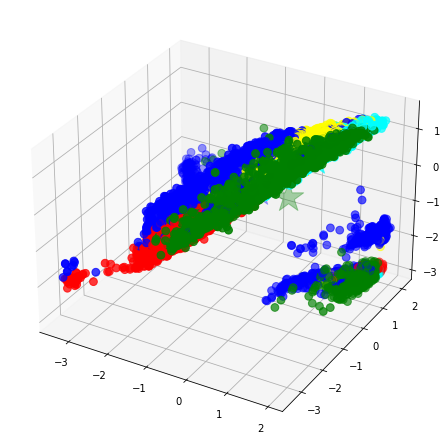

In [22]:
from mpl_toolkits.mplot3d import Axes3D

X = scaled_features_df.values
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=[6,6])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [23]:
# Perform K-Means Clustering without cyclical features

numerical_features_df = scaled_features_df.copy()
numerical_features_df = numerical_features_df.drop(['Month_sin', 'Month_cos', 'DayMnth_sin', 'DayMnth_cos', 'DayWeek_sin', 'DayWeek_cos'], 1)
numerical_features_df.head(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
474941,0.204554,0.085748,0.341093,0.005922,-0.339861,-0.581005,-0.516535,0.693296,0.425529,-0.582945,0.031817,0.759917


In [24]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)
kmeans.fit(numerical_features_df)
print('Inertia:', kmeans.inertia_)
print('Centroid:', kmeans.cluster_centers_)
print('Iterations:',  kmeans.n_iter_)

Inertia: 237903.59141867113
Centroid: [[-0.96704569 -0.9888845  -0.73277039 -0.99883713 -0.36715668 -0.36498287
  -0.35440729 -0.25113188 -0.25795238 -0.35546068 -0.09661975 -0.11344147]
 [ 0.44029593  0.45056213  0.51361088  0.63991714  0.45929521  0.4581946
   0.44069481 -0.13798729 -0.15495865  0.42031248  0.16216476  0.13899813]
 [ 0.35270113  0.12907605 -0.31553037  0.14097935  0.02132067 -0.14134802
  -0.16366383  2.68775473  2.63887169 -0.19622939  0.49587055  0.71051154]
 [ 0.6972981   0.72036513  0.52348779  0.6086843  -0.6996029  -0.68062861
  -0.68032927 -0.16272531 -0.13703202 -0.66549604 -0.16898633 -0.19765048]
 [-0.25816327 -0.14876091 -0.18861897 -0.1806496   2.12090889  2.15916248
   2.17519394 -0.13613505 -0.12721976  2.19522898  0.14609097  0.19380104]]
Iterations: 19


In [25]:
kmeans.labels_[:5]

array([3, 3, 3, 3, 3])

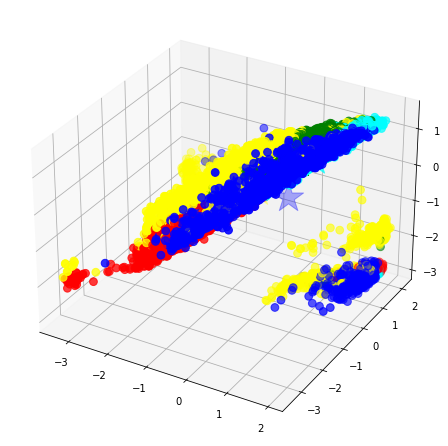

In [26]:
from mpl_toolkits.mplot3d import Axes3D

X = numerical_features_df.values
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=[6,6])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [27]:
# Choosing the number of clusters
# Elbow method

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_df)
    sse.append(kmeans.inertia_)

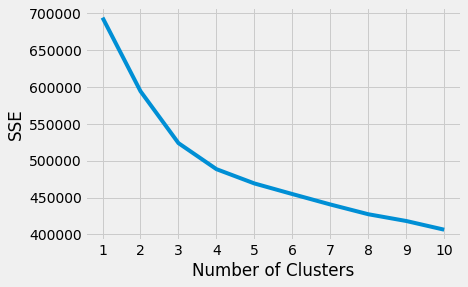

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [29]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [30]:
# Silhouette coefficient

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_df)
    score = silhouette_score(scaled_features_df, kmeans.labels_)
    silhouette_coefficients.append(score)

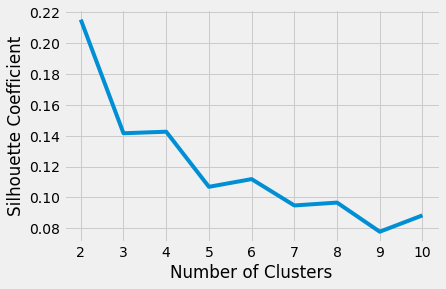

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [32]:
# After analising Elbow method and Silhouette coefficient, we choose 4 clusters to develop K-Means Clustering 
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features_df)
print('Inertia:', kmeans.inertia_)
print('Centroid:', kmeans.cluster_centers_)
print('Iterations:',  kmeans.n_iter_)

Inertia: 488613.39265156456
Centroid: [[ 6.89433811e-01  7.15839845e-01  5.75622170e-01  6.85448628e-01
  -3.61925258e-01 -3.46184774e-01 -3.54153220e-01 -1.75114654e-01
  -1.59629347e-01 -3.51369837e-01 -6.70560259e-02 -9.93780725e-02
   1.01797617e-02 -3.64478614e-02 -1.34881891e-03 -2.01209125e-03
  -2.01716955e-03 -1.12752670e-02]
 [-9.03293379e-01 -9.22544926e-01 -6.63358359e-01 -9.16831220e-01
  -3.53184073e-01 -3.49879169e-01 -3.39337794e-01 -2.56424501e-01
  -2.62305110e-01 -3.40775820e-01 -9.07264919e-02 -1.17616379e-01
  -9.28266141e-03  5.18180733e-02  1.07876799e-02  8.39425282e-03
   8.18866263e-03  3.90103416e-03]
 [-1.31641951e-01 -5.06385404e-02 -1.40189874e-02  1.88110298e-02
   1.83317335e+00  1.86895208e+00  1.88161072e+00 -1.56936382e-01
  -1.48078972e-01  1.89422875e+00  1.47051517e-01  1.52261028e-01
  -1.44516922e-02 -4.14383481e-02 -4.73683733e-03 -2.12862821e-02
  -4.16403909e-03  1.49925570e-02]
 [ 4.00381611e-01  1.78404132e-01 -2.62100629e-01  1.89884501e-01

In [33]:
kmeans.labels_[:5]

array([0, 1, 0, 0, 0])

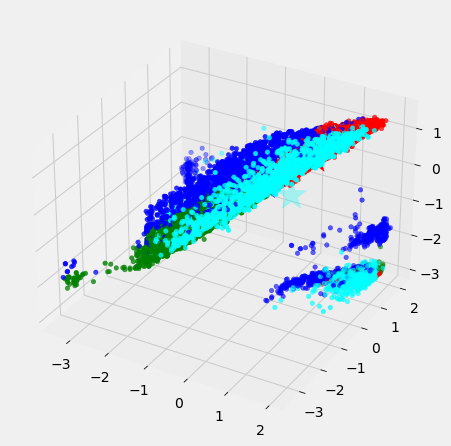

In [34]:
from mpl_toolkits.mplot3d import Axes3D

X = scaled_features_df.values
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=[6,6])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [35]:
# Now we try with 3 clusters

kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features_df)
print('Inertia:', kmeans.inertia_)
print('Centroid:', kmeans.cluster_centers_)
print('Iterations:',  kmeans.n_iter_)

Inertia: 523928.45291989826
Centroid: [[ 7.24161757e-01  6.99270410e-01  5.13553757e-01  6.73137446e-01
  -3.32255772e-01 -3.37398622e-01 -3.48258484e-01  1.06281823e-01
   1.11186414e-01 -3.49911679e-01 -8.80100143e-03  5.23641462e-04
   1.24856621e-02 -3.21123077e-02  1.44495631e-04  4.05263364e-03
   2.33913009e-03 -1.19502556e-02]
 [-1.15151796e-01 -4.84494565e-02 -3.57729780e-02  2.96866556e-02
   1.79683080e+00  1.81632505e+00  1.82628448e+00  6.29675986e-04
  -1.62286212e-03  1.83623922e+00  1.88786366e-01  2.19363138e-01
  -1.06688001e-02 -3.27737161e-02 -1.55741077e-02 -2.61638217e-02
  -8.30249254e-03  1.65469527e-02]
 [-8.97660337e-01 -8.94260752e-01 -6.56673740e-01 -8.94238825e-01
  -3.51271478e-01 -3.53068847e-01 -3.43209484e-01 -1.39416081e-01
  -1.44851350e-01 -3.45401129e-01 -7.10863489e-02 -9.66735062e-02
  -1.16773972e-02  5.63813227e-02  6.62568185e-03  6.14308162e-03
   5.70659136e-04  8.40432458e-03]]
Iterations: 11


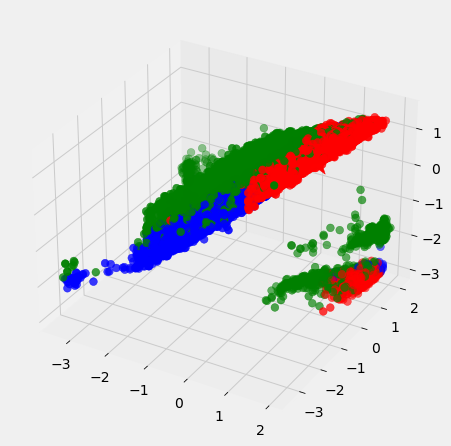

In [36]:
from mpl_toolkits.mplot3d import Axes3D

X = scaled_features_df.values
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=[6,6])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [37]:
scaled_features_df.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Month_sin', 'Month_cos', 'DayMnth_sin',
       'DayMnth_cos', 'DayWeek_sin', 'DayWeek_cos'],
      dtype='object')

In [44]:
numerical_features_df.head(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
474941,0.204554,0.085748,0.341093,0.005922,-0.339861,-0.581005,-0.516535,0.693296,0.425529,-0.582945,0.031817,0.759917


In [58]:
# Using Principal Component Analysis (PCA)
# PCA with n_components=2) 

from sklearn.decomposition import PCA

X = scaled_features_df
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principal_df

,principal component 1,principal component 2
0,-0.924429,-0.364305
1,-1.328984,0.405980
2,-1.684307,-1.130198
3,-1.350449,-2.165811
4,-0.636194,-1.594902
...,...,...
38562,-0.920202,-1.298311
38563,-1.036351,-1.890250
38564,-0.186825,-0.695140
38565,3.900808,1.160742


In [59]:
# Choosing the number of clusters
# Elbow method

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principal_df)
    sse.append(kmeans.inertia_)

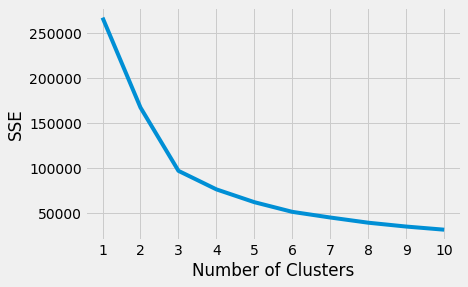

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [61]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [62]:
# Silhouette coefficient

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principal_df)
    score = silhouette_score(principal_df, kmeans.labels_)
    silhouette_coefficients.append(score)

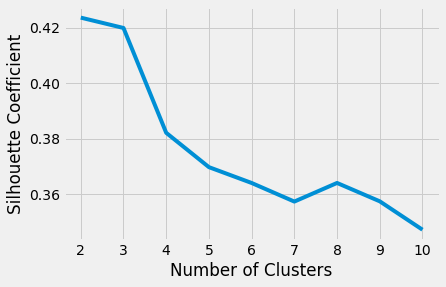

In [63]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [66]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(principal_df)
print('Inertia:', kmeans.inertia_)
print('Centroid:', kmeans.cluster_centers_)
print('Iterations:',  kmeans.n_iter_)

Inertia: 97126.11615903708
Centroid: [[-0.6204019   1.7372047 ]
 [-0.76204985 -1.28728448]
 [ 3.60069958 -0.11036475]]
Iterations: 13


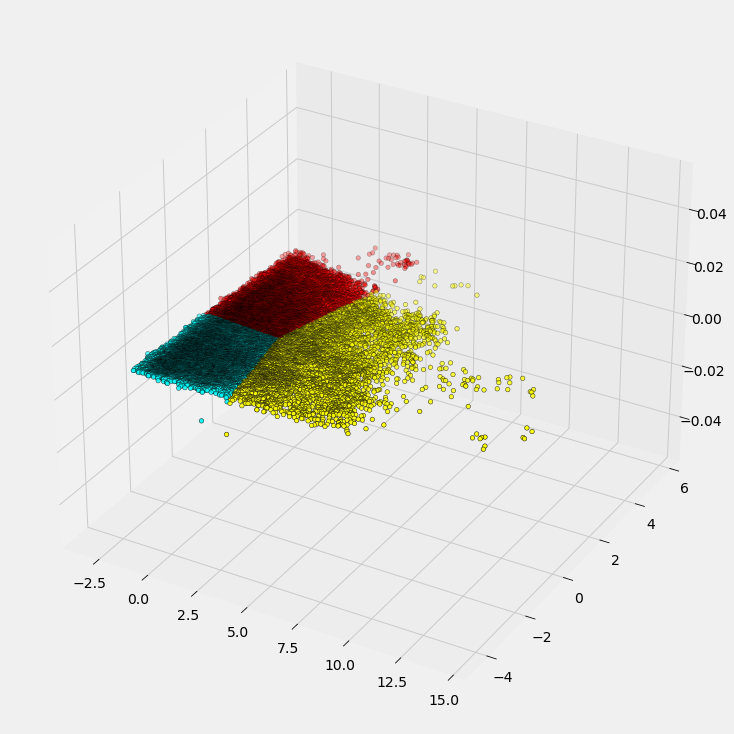

In [80]:
from mpl_toolkits.mplot3d import Axes3D

X = principal_df.values
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=[10,10])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,edgecolors='black', s=20)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

In [ ]:
The clusters are well separated We can clearly visualize the three clusters here.

In [82]:
# Now let`s try with PCA with n_components=3)

from sklearn.decomposition import PCA

X = scaled_features_df
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 
                                                             'principal component 2', 'principal component 3' ])
pca_df

,principal component 1,principal component 2,principal component 3
0,-0.924427,-0.364281,0.998363
1,-1.328984,0.405980,-0.929592
2,-1.684307,-1.130194,-0.974012
3,-1.350448,-2.165799,-0.838056
4,-0.636193,-1.594893,-1.390238
...,...,...,...
38562,-0.920201,-1.298299,-0.010861
38563,-1.036351,-1.890253,-1.151415
38564,-0.186824,-0.695134,-1.113959
38565,3.900803,1.160689,-0.490441


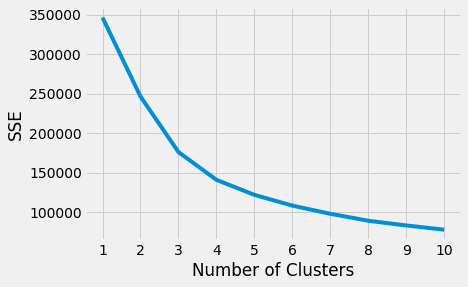

In [84]:
# Choosing the number of clusters
# Elbow method

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [85]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [144]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)
kmeans.fit(pca_df)
print('Inertia:', kmeans.inertia_)
print('Centroid:', kmeans.cluster_centers_)
print('Iterations:',  kmeans.n_iter_)

Inertia: 140811.6615512265
Centroid: [[ 3.72116597 -0.07071961 -0.33864119]
 [-0.79921292 -1.2462976  -0.42300476]
 [-0.6163061   1.79336441 -0.11126678]
 [-0.0244608  -0.80005004  3.44262884]]
Iterations: 19


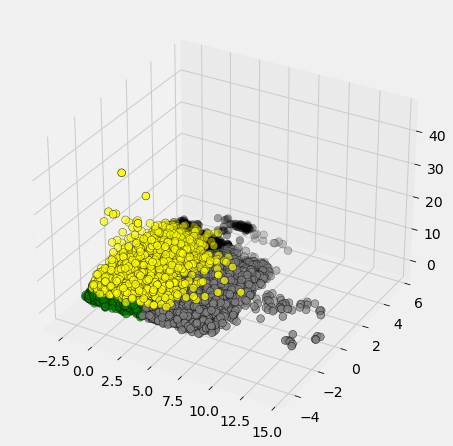

In [148]:
from mpl_toolkits.mplot3d import Axes3D

X = pca_df.values
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['gray','green','black','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=[6,6])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, edgecolors='black', s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In the case of 4 clusters, the image indicatescsome overlaping of data. We cannot visualize all the four clusters clearly.

### Nivell 2

#### - Exercici 2
Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [88]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

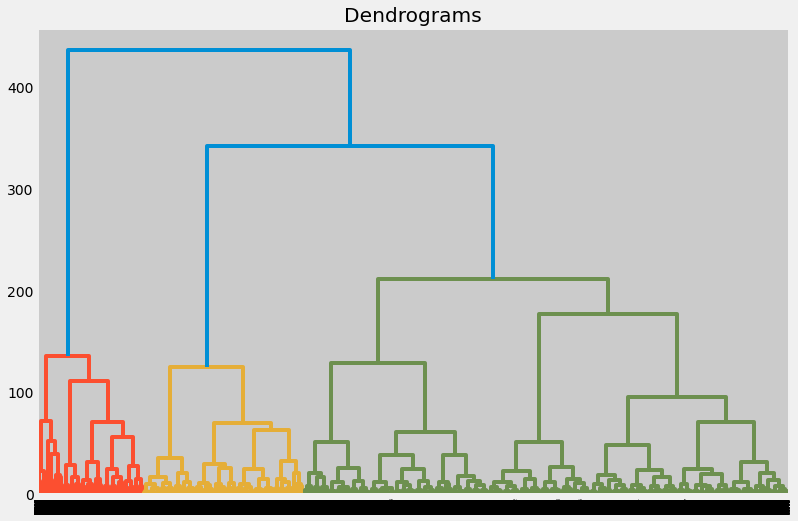

In [94]:
import scipy.cluster.hierarchy as shc

X = principal_df 

plt.figure(figsize=(12, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

The largest ΔSSE is between having 2 clusters or 3 clusters, which means a line that cut the dendrogram at two points (y = 400) or at three points (y=300). Both options are reasonable and both options will be checked in order to verify the results.

In [92]:
# Hierarchical clustering for 2 clusters:
from sklearn.cluster import AgglomerativeClustering

X = principal_df.values
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
labels = cluster.labels_
labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

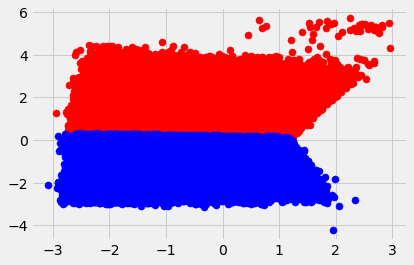

In [93]:
# Visulalization of the 2 clusters

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

In [100]:
# Hierarchical clustering for 3 clusters:

X = principal_df.values
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [111]:
labels = cluster.labels_

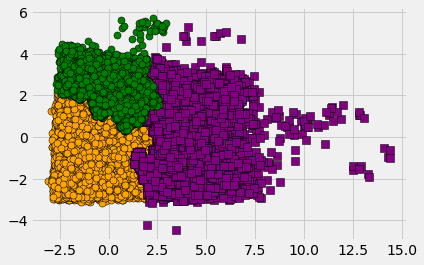

In [112]:
# Visulalization of the 3 clusters

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', edgecolors='black', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='s', edgecolors='black', color='purple')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o',  edgecolors='black', color='green')
plt.show()

### Nivell 3


#### - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [122]:
# PCA (n_components=2) and K-means with cluster = 2 

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score


# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(principal_df.values)
dbscan.fit(principal_df.values)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(principal_df, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(principal_df, dbscan.labels_).round (2)

print('kmeans_silhouette', kmeans_silhouette)
print('dbscan_silhouette', dbscan_silhouette)

kmeans_silhouette 0.42
dbscan_silhouette 0.4


In [129]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 91, 0: 38436, 1: 9, 2: 21, 3: 10}

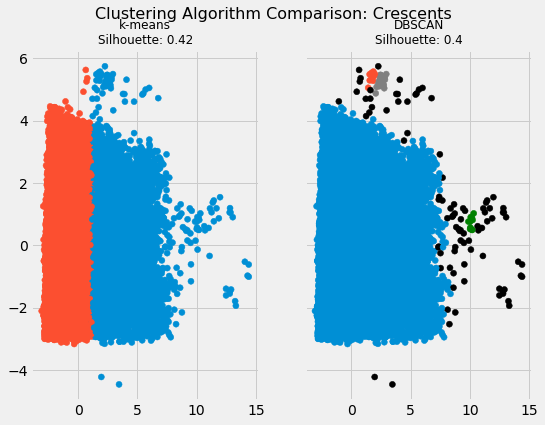

In [134]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {-1: "black", 0: "#008fd5", 1: "#fc4f30", 2: "gray", 3: "green", 4: "yellow"}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(principal_df.values[:, 0], principal_df.values[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot             
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(principal_df.values[:, 0], principal_df.values[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()

A higher silhouette coefficient may suggest better clusters. The DBSCAN algorithm finds more clear clusters according to the shape of the data.

In [139]:
# Now let`s try with PCA (n_components=3) y K-means with cluster = 4 

kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.8)

kmeans.fit(pca_df.values)
dbscan.fit(pca_df.values)

kmeans_silhouette = silhouette_score(pca_df.values, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(pca_df.values, dbscan.labels_).round (2)

print(kmeans_silhouette)
print(dbscan_silhouette)

0.35
0.51


In [140]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 160, 0: 38388, 1: 5, 2: 9, 3: 5}

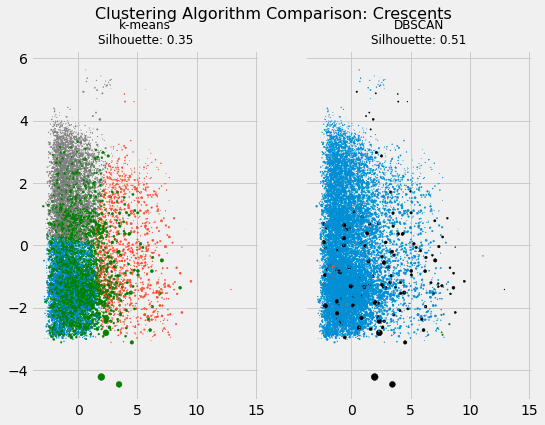

In [142]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {-1: "black", 0: "#008fd5", 1: "#fc4f30", 2: "gray", 3: "green"}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(pca_df.values[:, 0], pca_df.values[:, 1], pca_df.values[:, 2], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot             
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(pca_df.values[:, 0], pca_df.values[:, 1], pca_df.values[:, 2], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()

There is some overlaping of clusters on both plots.  

In [154]:
#  PCA with (n_components=2) y K-means with cluster = 4 

kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.5)

kmeans.fit(principal_df.values)
dbscan.fit(principal_df.values)

kmeans_silhouette = silhouette_score(principal_df.values, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(principal_df.values, dbscan.labels_).round(2)

print(kmeans_silhouette)
print(dbscan_silhouette)

0.42
0.63


In [155]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 34, 0: 38520, 1: 8, 2: 5}

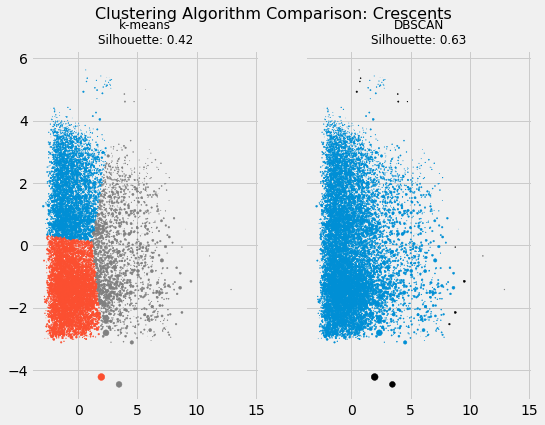

In [156]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {-1: "black", 0: "#008fd5", 1: "#fc4f30", 2: "gray", 3: "green"}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(pca_df.values[:, 0], pca_df.values[:, 1], pca_df.values[:, 2], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot             
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(pca_df.values[:, 0], pca_df.values[:, 1], pca_df.values[:, 2], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()

With 3 clusters, the visualizantion of K-means is clearly. It is possible to identify the 3 different clusters. 

The result of the silhouette is higher. However, according to the shape of the data, the plot of DBSCAN does not show natural clusters. 